In [6]:
import torch
import pandas as pd
import plotnine as pn

import sys
sys.path.append("/Users/nathanielimel/uci/projects/ibsg/src")
from misc.tools import random_stochastic_matrix
from misc.vis import numeric_col_to_categorical

In [7]:
encoder = random_stochastic_matrix((10, 10), 1e-5)

In [8]:
# Reshape data into tidydata
num_meanings, num_words = encoder.shape
meanings = torch.tensor([[i] * num_words for i in range(num_meanings)]).flatten()
words = torch.tensor(list(range(num_words)) * num_meanings)

data = torch.stack([meanings, words, encoder.flatten()]).T

data = pd.DataFrame(data, columns=["meanings", "words", "p(w|m)"])

data = numeric_col_to_categorical(data, "words")
data = numeric_col_to_categorical(data, "meanings")

data

,meanings,words,p(w|m)
0,0,0,0.099999
1,0,1,0.099998
2,0,2,0.100000
3,0,3,0.100001
4,0,4,0.100001
...,...,...,...
95,9,5,0.100000
96,9,6,0.100000
97,9,7,0.100000
98,9,8,0.100002


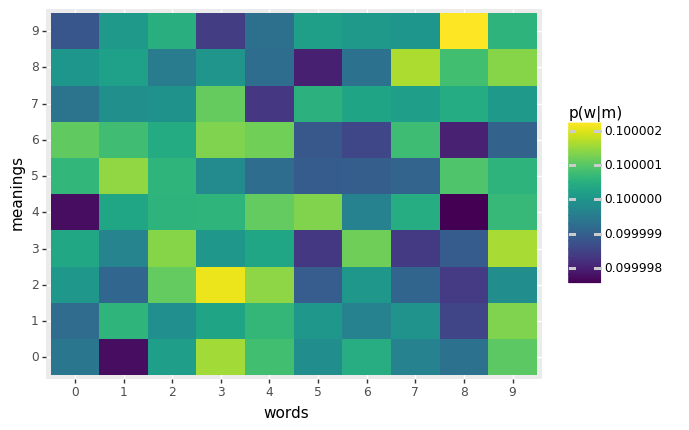

In [9]:
plot = (
    pn.ggplot(data, pn.aes(x="words", y="meanings", fill="p(w|m)"))
    + pn.geom_tile()
)
print(plot)

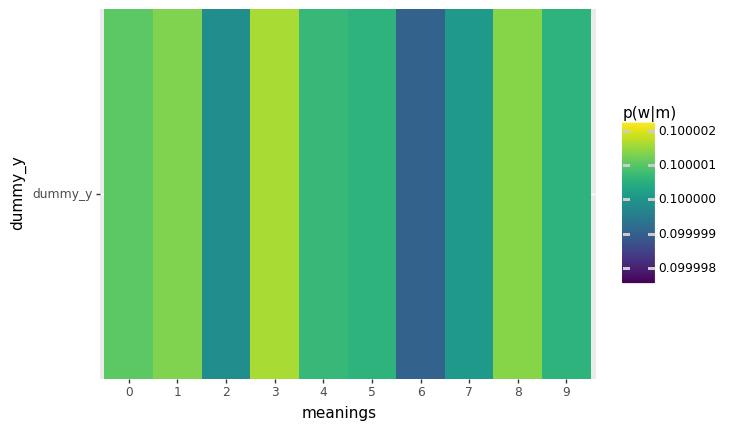

In [17]:
# data["dummy_y"] = "dummy_y"

# plot = (
#     pn.ggplot(data, pn.aes(x="meanings", y="dummy_y", fill="p(w|m)"))
#     + pn.geom_tile()
# )
# print(plot)

In [20]:
# Now try creating frequency dists

data["meanings"] = data["meanings"].astype(int).astype(float)

plot = (
    pn.ggplot(data, pn.aes(x="meanings", y="p(w|m)"))
    + pn.geom_histogram(
        mapping=pn.aes(
            color="words",
        ),
        stat="identity",
        size=1,
    )
)
print(plot)

PlotnineError: 'stat_bin() must not be used with a y aesthetic.'